In [1]:
from __future__ import annotations
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt
import getdist
import getdist.plots as gdplt
from pathlib import Path
from typing import Any, cast
from matplotlib.cm import tab10  # type: ignore
from cobaya import get_model
from eftpipe.reader import read_pkl

In [2]:
os.chdir("../")

In [3]:
from script.mkbestfit import main as mkbestfit
from script.mkbestfit import extract_sampled_bestfit

In [4]:
plt.rcParams["text.usetex"] = True
GREY = tab10.colors[-3]
BLUE = tab10.colors[0]
ORANGE = tab10.colors[1]
GREEN = tab10.colors[2]
RED = tab10.colors[3]

In [5]:
def add_markers(
    g: gdplt.GetDistPlotter,
    markers: dict[str, float],
    marker_args: dict[str, Any] = {"c": "k", "ls": "--", "lw": 1},
    all_params: list[str] | None = None
):
    for name, value in markers.items():
        if ax := g.get_axes_for_params(name):
            ax.axvline(value, **marker_args)
    if all_params:
        all_params = all_params + list(markers.keys())
        all_params = list(set(all_params))
        for xname, xvalue in markers.items():
            for yname in all_params:
                if ax := g.get_axes_for_params(xname, yname):
                    ax.axvline(xvalue, **marker_args)
        for yname, yvalue in markers.items():
            for xname in all_params:
                if ax := g.get_axes_for_params(xname, yname):
                    ax.axhline(yvalue, **marker_args)
        return
    for (xname, xvalue), (yname, yvalue) in itertools.permutations(markers.items(), 2):
        if ax := g.get_axes_for_params(xname, yname):
            ax.axvline(xvalue, **marker_args)
            ax.axhline(yvalue, **marker_args)

def add_bestfit(
    g: gdplt.GetDistPlotter, bestfit: dict[str, float], color
):
    for (xname, xvalue), (yname, yvalue) in itertools.permutations(bestfit.items(), 2):
        if ax := g.get_axes_for_params(xname, yname):
            ax.scatter(xvalue, yvalue, color=color, marker="x")

In [6]:
truth = {
    "omegam": 0.307115,
    "sigma8": 0.8225,
    "H0": 67.77,
    "rdrag": 147.66,
    "omegach2": 0.1189,
    "omegabh2": 0.02214,
    "h": 0.6777,
    "logA": 3.05122,
}

In [6]:
settings = {"ignore_rows": 0.3}
pathlist = [
    "cobaya/chains/v0_noric_ELG_NGC_l02_Vx27_kmax0.15",
    "cobaya/chains/v0_noric_ELG_NGC_l02_Vx27_kmax0.18",
    "cobaya/chains/v0_noric_ELG_NGC_l02_Vx27_kmax0.20",
    "cobaya/chains/v0_noric_ELG_NGC_l02_Vx27_kmax0.23",
    "cobaya/chains/v0_noric_ELG_NGC_l02_Vx27_kmax0.25",
]
(ELG_NGC_0p15, ELG_NGC_0p18, ELG_NGC_0p20, ELG_NGC_0p23, ELG_NGC_0p25) = [
    getdist.loadMCSamples(path, settings=settings) for path in pathlist
]
(ELG_NGC_0p15_best, ELG_NGC_0p18_best, ELG_NGC_0p20_best, ELG_NGC_0p23_best, ELG_NGC_0p25_best) = [
    extract_sampled_bestfit(path + ".minimum", False) for path in pathlist
]

_ngc_samples = [ELG_NGC_0p15, ELG_NGC_0p18, ELG_NGC_0p20, ELG_NGC_0p23, ELG_NGC_0p25]
for x in _ngc_samples:
    x.updateRenames({"b1": ["ELG_NGC_b1"], "c2": ["ELG_NGC_c2"]})


pathlist = [
    "cobaya/chains/v0_noric_ELG_SGC_l02_Vx27_kmax0.15",
    "cobaya/chains/v0_noric_ELG_SGC_l02_Vx27_kmax0.18",
    "cobaya/chains/v0_noric_ELG_SGC_l02_Vx27_kmax0.20",
    "cobaya/chains/v0_noric_ELG_SGC_l02_Vx27_kmax0.23",
    "cobaya/chains/v0_noric_ELG_SGC_l02_Vx27_kmax0.25",
]
(ELG_SGC_0p15, ELG_SGC_0p18, ELG_SGC_0p20, ELG_SGC_0p23, ELG_SGC_0p25) = [
    getdist.loadMCSamples(path, settings=settings) for path in pathlist
]
(ELG_SGC_0p15_best, ELG_SGC_0p18_best, ELG_SGC_0p20_best, ELG_SGC_0p23_best, ELG_SGC_0p25_best) = [
    extract_sampled_bestfit(path + ".minimum", False) for path in pathlist
]
_sgc_samples = [ELG_SGC_0p15, ELG_SGC_0p18, ELG_SGC_0p20, ELG_SGC_0p23, ELG_SGC_0p25]
for x in _sgc_samples:
    x.updateRenames({"b1": ["ELG_SGC_b1"], "c2": ["ELG_SGC_c2"]})

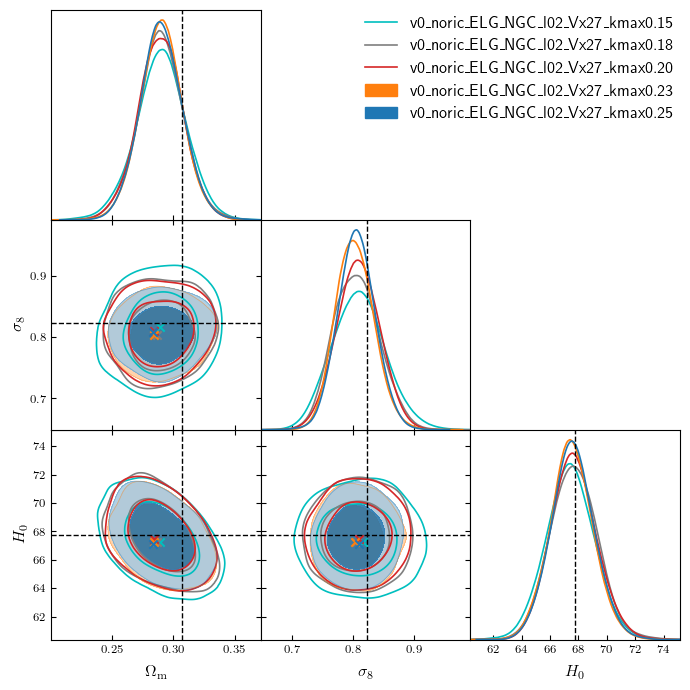

In [8]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
roots = [ELG_NGC_0p15, ELG_NGC_0p18, ELG_NGC_0p20, ELG_NGC_0p23, ELG_NGC_0p25]
bestfits = [ELG_NGC_0p15_best, ELG_NGC_0p18_best, ELG_NGC_0p20_best, ELG_NGC_0p23_best, ELG_NGC_0p25_best]
colors = ["c", GREY, RED, ORANGE, BLUE]
g.triangle_plot(
    roots,
    params,
    filled=[False, False, False, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    # contour_ls=[":", "--", "-.", "-", "-"],
    contour_lws=[1.2] * 5,
)
for bestfit, color in zip(bestfits, colors):
    add_bestfit(g, bestfit, color)
add_markers(g, truth, all_params=params)
plt.show()

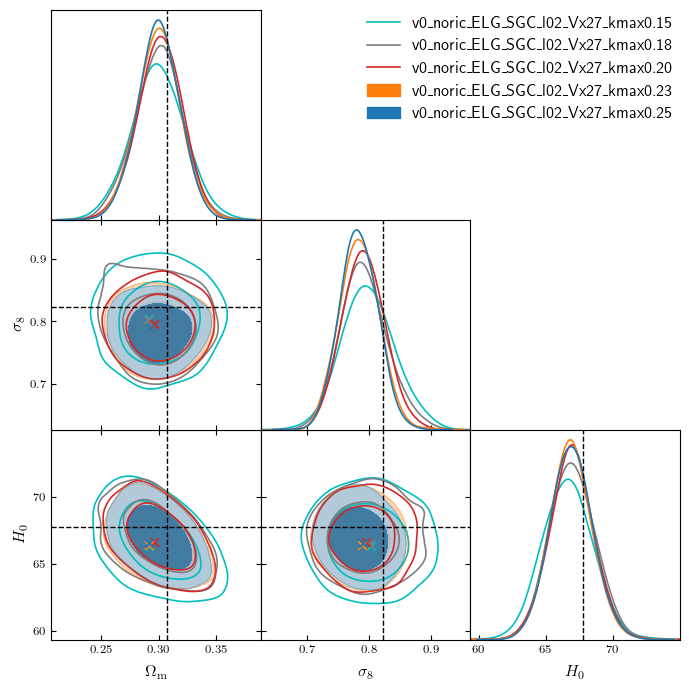

In [9]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
roots = [ELG_SGC_0p15, ELG_SGC_0p18, ELG_SGC_0p20, ELG_SGC_0p23, ELG_SGC_0p25]
bestfits = [ELG_SGC_0p15_best, ELG_SGC_0p18_best, ELG_SGC_0p20_best, ELG_SGC_0p23_best, ELG_SGC_0p25_best]
colors = ["c", GREY, RED, ORANGE, BLUE]
g.triangle_plot(
    roots,
    params,
    filled=[False, False, False, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    # contour_ls=[":", "--", "-.", "-", "-"],
    contour_lws=[1.2] * 5,
)
for bestfit, color in zip(bestfits, colors):
    add_bestfit(g, bestfit, color)
add_markers(g, truth, all_params=params)
plt.show()

### NGC vs SGC

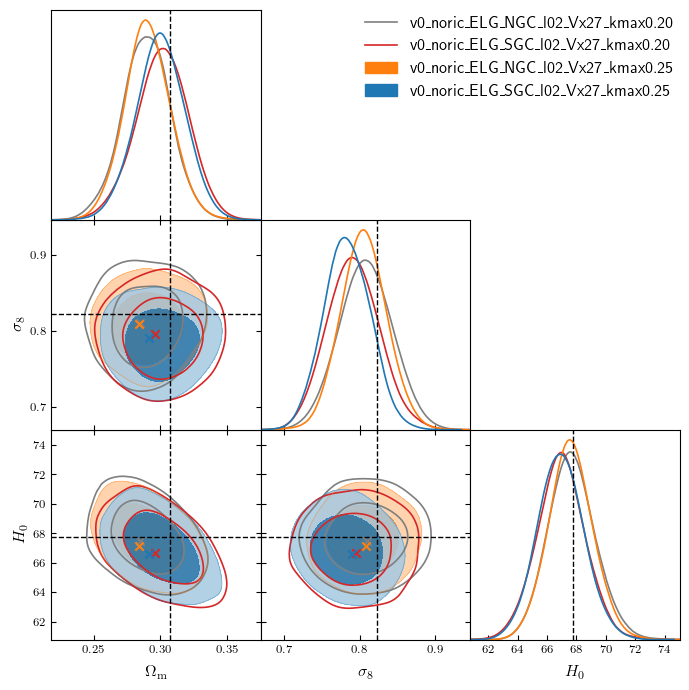

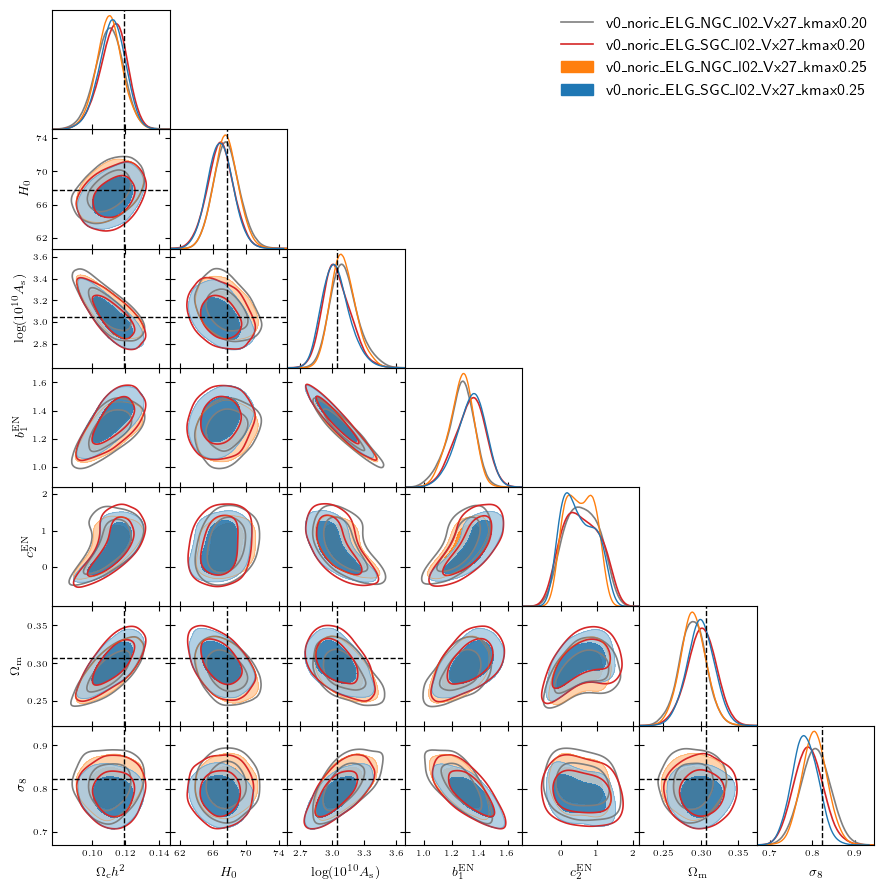

In [10]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
bestfits = [ELG_NGC_0p20_best, ELG_SGC_0p20_best, ELG_NGC_0p25_best, ELG_SGC_0p25_best]
colors = [GREY, RED, ORANGE, BLUE]
g.triangle_plot(
    [ELG_NGC_0p20, ELG_SGC_0p20, ELG_NGC_0p25, ELG_SGC_0p25],
    params,
    filled=[False, False, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=[1.2] * 5,
)
for bestfit, color in zip(bestfits, colors):
    add_bestfit(g, bestfit, color)
add_markers(g, truth, all_params=params)
plt.show()

g = gdplt.get_subplot_plotter(width_inch=9)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 16
g.settings.figure_legend_loc = "upper right"
params = ["omegach2", "H0", "logA", "b1", "c2", "omegam", "sigma8"]
# params = ["omegam", "sigma8", "H0"]
g.triangle_plot(
    [ELG_NGC_0p20, ELG_SGC_0p20, ELG_NGC_0p25, ELG_SGC_0p25],
    params,
    filled=[False, False, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=[GREY, RED, ORANGE, BLUE],
    contour_lws=[1.2, 1.2, 1, 1],
)
add_markers(g, truth, all_params=params)
plt.show()

bestfit:
{'ELG_NGC_b1': 1.212881055,
 'ELG_NGC_b3': 0.4572307386441364,
 'ELG_NGC_c2': 0.2023406962,
 'ELG_NGC_cct': -0.8341216628024719,
 'ELG_NGC_ce0': 0.34828579542899446,
 'ELG_NGC_cequad': -0.008890537213603627,
 'ELG_NGC_cr1': -1.7758805232630863,
 'H0': 67.14916732,
 'logA': 3.171612827,
 'omegach2': 0.1057916857}


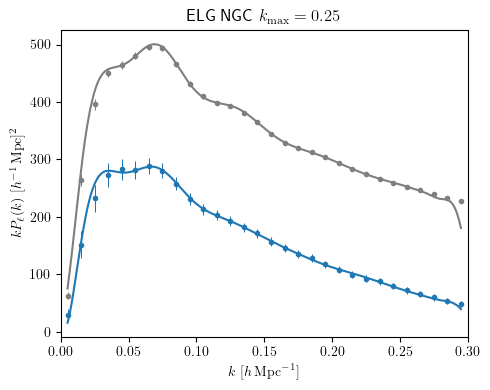

bestfit:
{'ELG_SGC_b1': 1.267231387,
 'ELG_SGC_b3': 0.5262234719232133,
 'ELG_SGC_c2': 0.1089414063,
 'ELG_SGC_cct': -0.5603148750642043,
 'ELG_SGC_ce0': 0.4537081756053628,
 'ELG_SGC_cequad': 0.031583512617401555,
 'ELG_SGC_cr1': -1.9294261419506158,
 'H0': 66.61533327,
 'logA': 3.111930225,
 'omegach2': 0.1071352669}


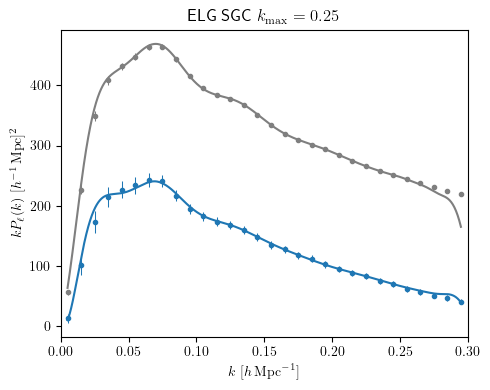

In [11]:
cmd = (
    "--likelihoods ELG_NGC "
    "--tracers ELG_NGC "
    "--base cobaya "
    "cobaya/chains/v0_noric_ELG_NGC_l02_Vx27_kmax0.25.input.yaml "
)
mkbestfit(cmd.split())
plt.title(R"ELG NGC $k_\mathrm{max}=0.25$")
plt.show()

cmd = (
    "--likelihoods ELG_SGC "
    "--tracers ELG_SGC "
    "--base cobaya "
    "cobaya/chains/v0_noric_ELG_SGC_l02_Vx27_kmax0.25.input.yaml "
)
mkbestfit(cmd.split())
plt.title(R"ELG SGC $k_\mathrm{max}=0.25$")
plt.show()

### $P_0+P_2+P_4$

In [30]:
settings = {"ignore_rows": 0.3}
pathlist = [
    "cobaya/chains/v0_noric_ELG_NGC_l024_Vx27_kmax0.20",
    "cobaya/chains/v0_noric_ELG_SGC_l024_Vx27_kmax0.20",
    "cobaya/chains/v0_noric_ELG_NGC_l024_Vx27_kmax0.25",
    "cobaya/chains/v0_noric_ELG_SGC_l024_Vx27_kmax0.25",
    "cobaya/chains/v0_noric_ELG_NS_l024_Vx27_kmax0.25",
]
names = [
    "ELG.NGC.hex.0p20",
    "ELG.SGC.hex.0p20",
    "ELG.NGC.hex.0p25",
    "ELG.SGC.hex.0p25",
    "ELG.NS.hex.0p25",
]
samples = {
    k: getdist.loadMCSamples(v, settings=settings) for k, v in zip(names, pathlist)
}
bestfit = {
    k: extract_sampled_bestfit(v + ".minimum", False) for k, v in zip(names, pathlist)
}

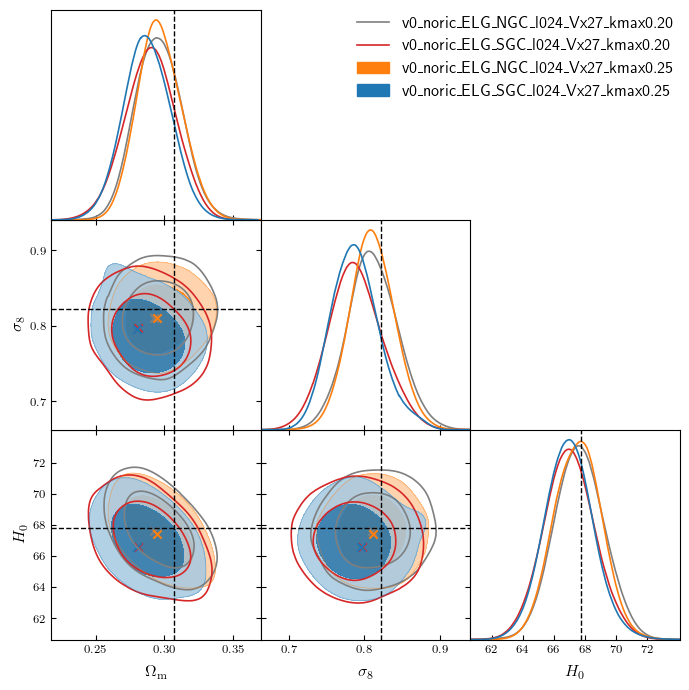

In [28]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
_bestfits = [
    bestfit["ELG.NGC.hex.0p20"],
    bestfit["ELG.SGC.hex.0p20"],
    bestfit["ELG.NGC.hex.0p25"],
    bestfit["ELG.SGC.hex.0p25"]
]
colors = [GREY, RED, ORANGE, BLUE]
g.triangle_plot(
    [
        samples["ELG.NGC.hex.0p20"],
        samples["ELG.SGC.hex.0p20"],
        samples["ELG.NGC.hex.0p25"],
        samples["ELG.SGC.hex.0p25"],
    ],
    params,
    filled=[False, False, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=[1.2] * 5,
)
for x, color in zip(_bestfits, colors):
    add_bestfit(g, x, color)
add_markers(g, truth, all_params=params)
plt.show()


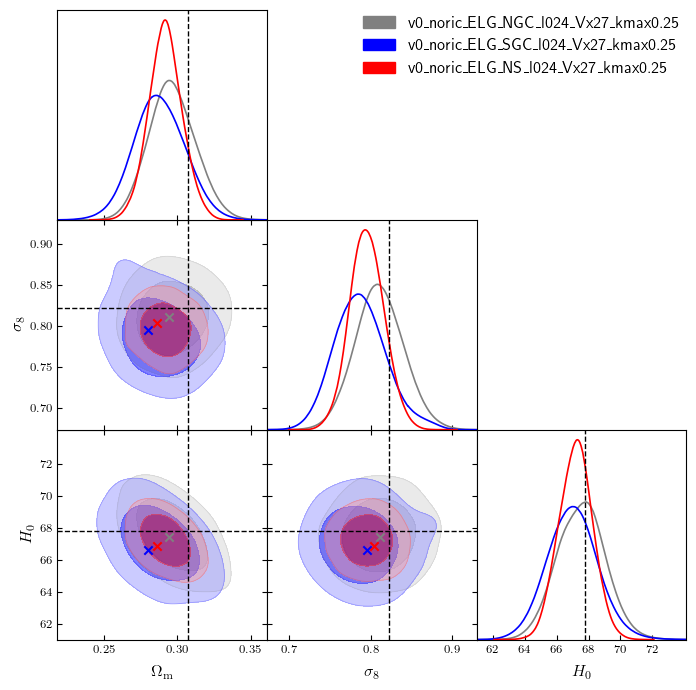

In [32]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
_bestfits = [bestfit["ELG.NGC.hex.0p25"], bestfit["ELG.SGC.hex.0p25"], bestfit["ELG.NS.hex.0p25"]]
colors = ["grey", "b", "r"]
g.triangle_plot(
    [samples["ELG.NGC.hex.0p25"], samples["ELG.SGC.hex.0p25"], samples["ELG.NS.hex.0p25"]],
    params,
    filled=[True, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=[1.2] * 5,
    contour_args=[{"alpha": 0.4}, {"alpha": 0.5}, {"alpha": 0.4}],
)
for x, color in zip(_bestfits, colors):
    add_bestfit(g, x, color)
add_markers(g, truth, all_params=params)
plt.show()

### exchange window

In [21]:
pathlist = [
    "cobaya/chains/v0_noric_ELG_NGC_SGCwin_l02_Vx27_kmax0.20",
    "cobaya/chains/v0_noric_ELG_SGC_NGCwin_l02_Vx27_kmax0.20",
]
ELG_NGC_wrongwin, ELG_SGC_wrongwin = [
    getdist.loadMCSamples(path, settings={"ignore_rows": 0.3})
    for path in pathlist
]
ELG_NGC_wrongwin_best, ELG_SGC_wrongwin_best = [
    extract_sampled_bestfit(path + ".minimum", False)
    for path in pathlist
]

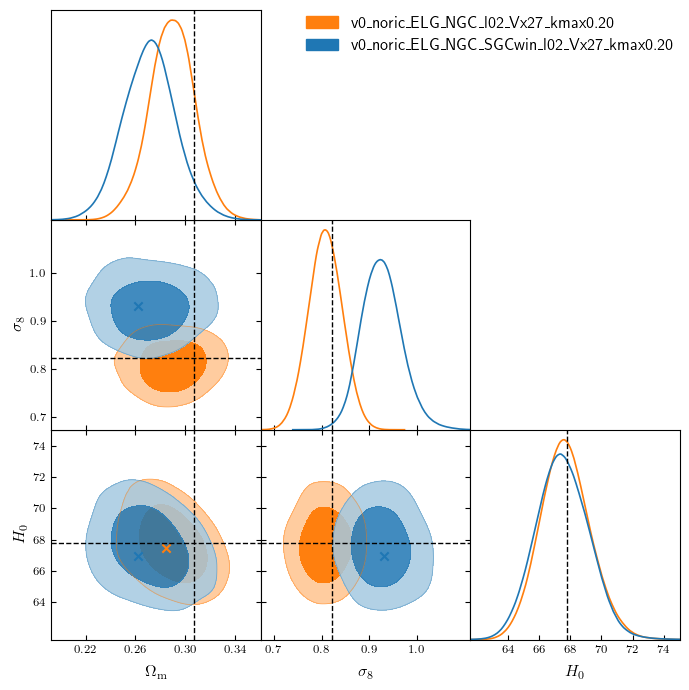

In [24]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
bestfits = [ELG_NGC_0p20_best, ELG_NGC_wrongwin_best]
colors = [ORANGE, BLUE]
g.triangle_plot(
    [ELG_NGC_0p20, ELG_NGC_wrongwin],
    params,
    filled=True,
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=[1.2] * 2,
)
for bestfit, color in zip(bestfits, colors):
    add_bestfit(g, bestfit, color)
add_markers(g, truth, all_params=params)
plt.show()

### release c4

In [12]:
includec4 = getdist.loadMCSamples(
    "cobaya/chains/v0_noric_ELG_NGC_releasec4_l02_Vx27_kmax0.20",
    settings={"ignore_rows": 0.3},
)

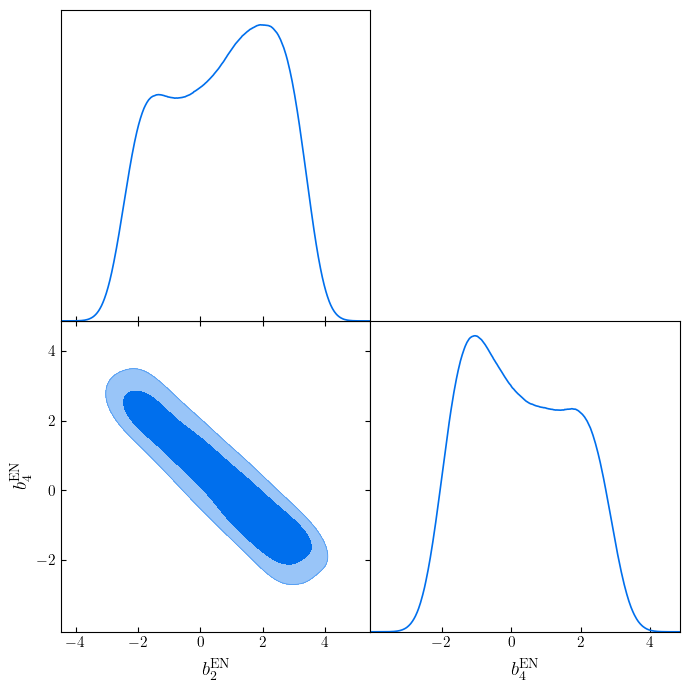

In [13]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
params = ["ELG_NGC_b2", "ELG_NGC_b4"]
g.triangle_plot(
    includec4,
    params,
    filled=True,
    diag1d_kwargs={"normalized": True},
    # contour_colors=[GREY, RED],
    contour_lws=[1.2, 1],
)
plt.show()

### hex test

In [14]:
settings = {"ignore_rows": 0.3}
pathlist = [
    "cobaya/chains/v0_noric_ELG_NGC_l024_Vx27_kmax0.15",
    "cobaya/chains/v0_noric_ELG_NGC_l024_Vx27_kmax0.20hex0.15",
    "cobaya/chains/v0_noric_ELG_NGC_l024_Vx27_kmax0.20",
    "cobaya/chains/v0_noric_ELG_NGC_l024_Vx27_kmax0.25hex0.20",
    "cobaya/chains/v0_noric_ELG_NGC_l024_Vx27_kmax0.25",
]
names = [
    "0.15",
    "0.20hex0.15",
    "0.20",
    "0.25hex0.20",
    "0.25",
]
hexdict = {
    name: getdist.loadMCSamples(path, settings=settings)
    for name, path in zip(names, pathlist)
}

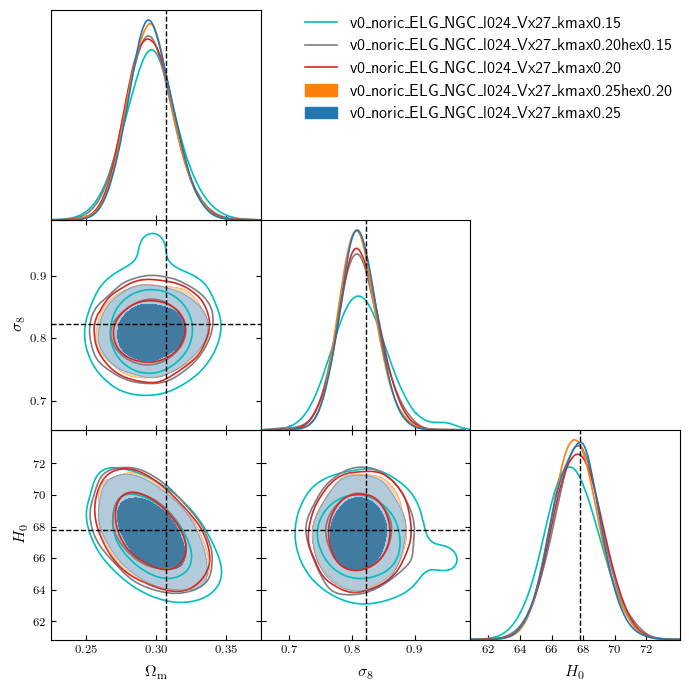

In [15]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
roots = list(hexdict.values())
colors = ["c", GREY, RED, ORANGE, BLUE]
g.triangle_plot(
    roots,
    params,
    filled=[False, False, False, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    # contour_ls=[":", "--", "-.", "-", "-"],
    contour_lws=[1.2] * 5,
)
add_markers(g, truth, all_params=params)
plt.show()